In [17]:
from ESD import *
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService

In [18]:
service = QiskitRuntimeService()

In [19]:
service.least_busy(simulator=False, operational=True, min_num_qubits=7)

<IBMBackend('ibm_lagos')>

In [20]:
from qiskit.providers.fake_provider import FakeNairobiV2
fake_backend = FakeNairobiV2()

In [21]:
c_map = fake_backend.coupling_map

# The circuit:

- GHZ 'reps'
- 30 layers (for a good derangement / initial state ratio)

In [22]:
qubits = 3
copies = 2
basis_gates = ['cx', 'rz', 'id', 'sx', 'x']
seed = 1
opt_level = 0
nb_shots = None

layers = 30

obs = QuantumCircuit(qubits)
obs.x(range(qubits))

In [23]:
initial_state = GHZreps(qubits = qubits, layers = layers)
initial_state.rz(np.pi/4, 0)

In [24]:
no_coupling_measure = esdCircuit(copies = copies, initial_state = initial_state, obs = obs,
                        basis_gates = basis_gates, seed = seed, opt_level = opt_level,
                        coupling_map=None, measure=True)

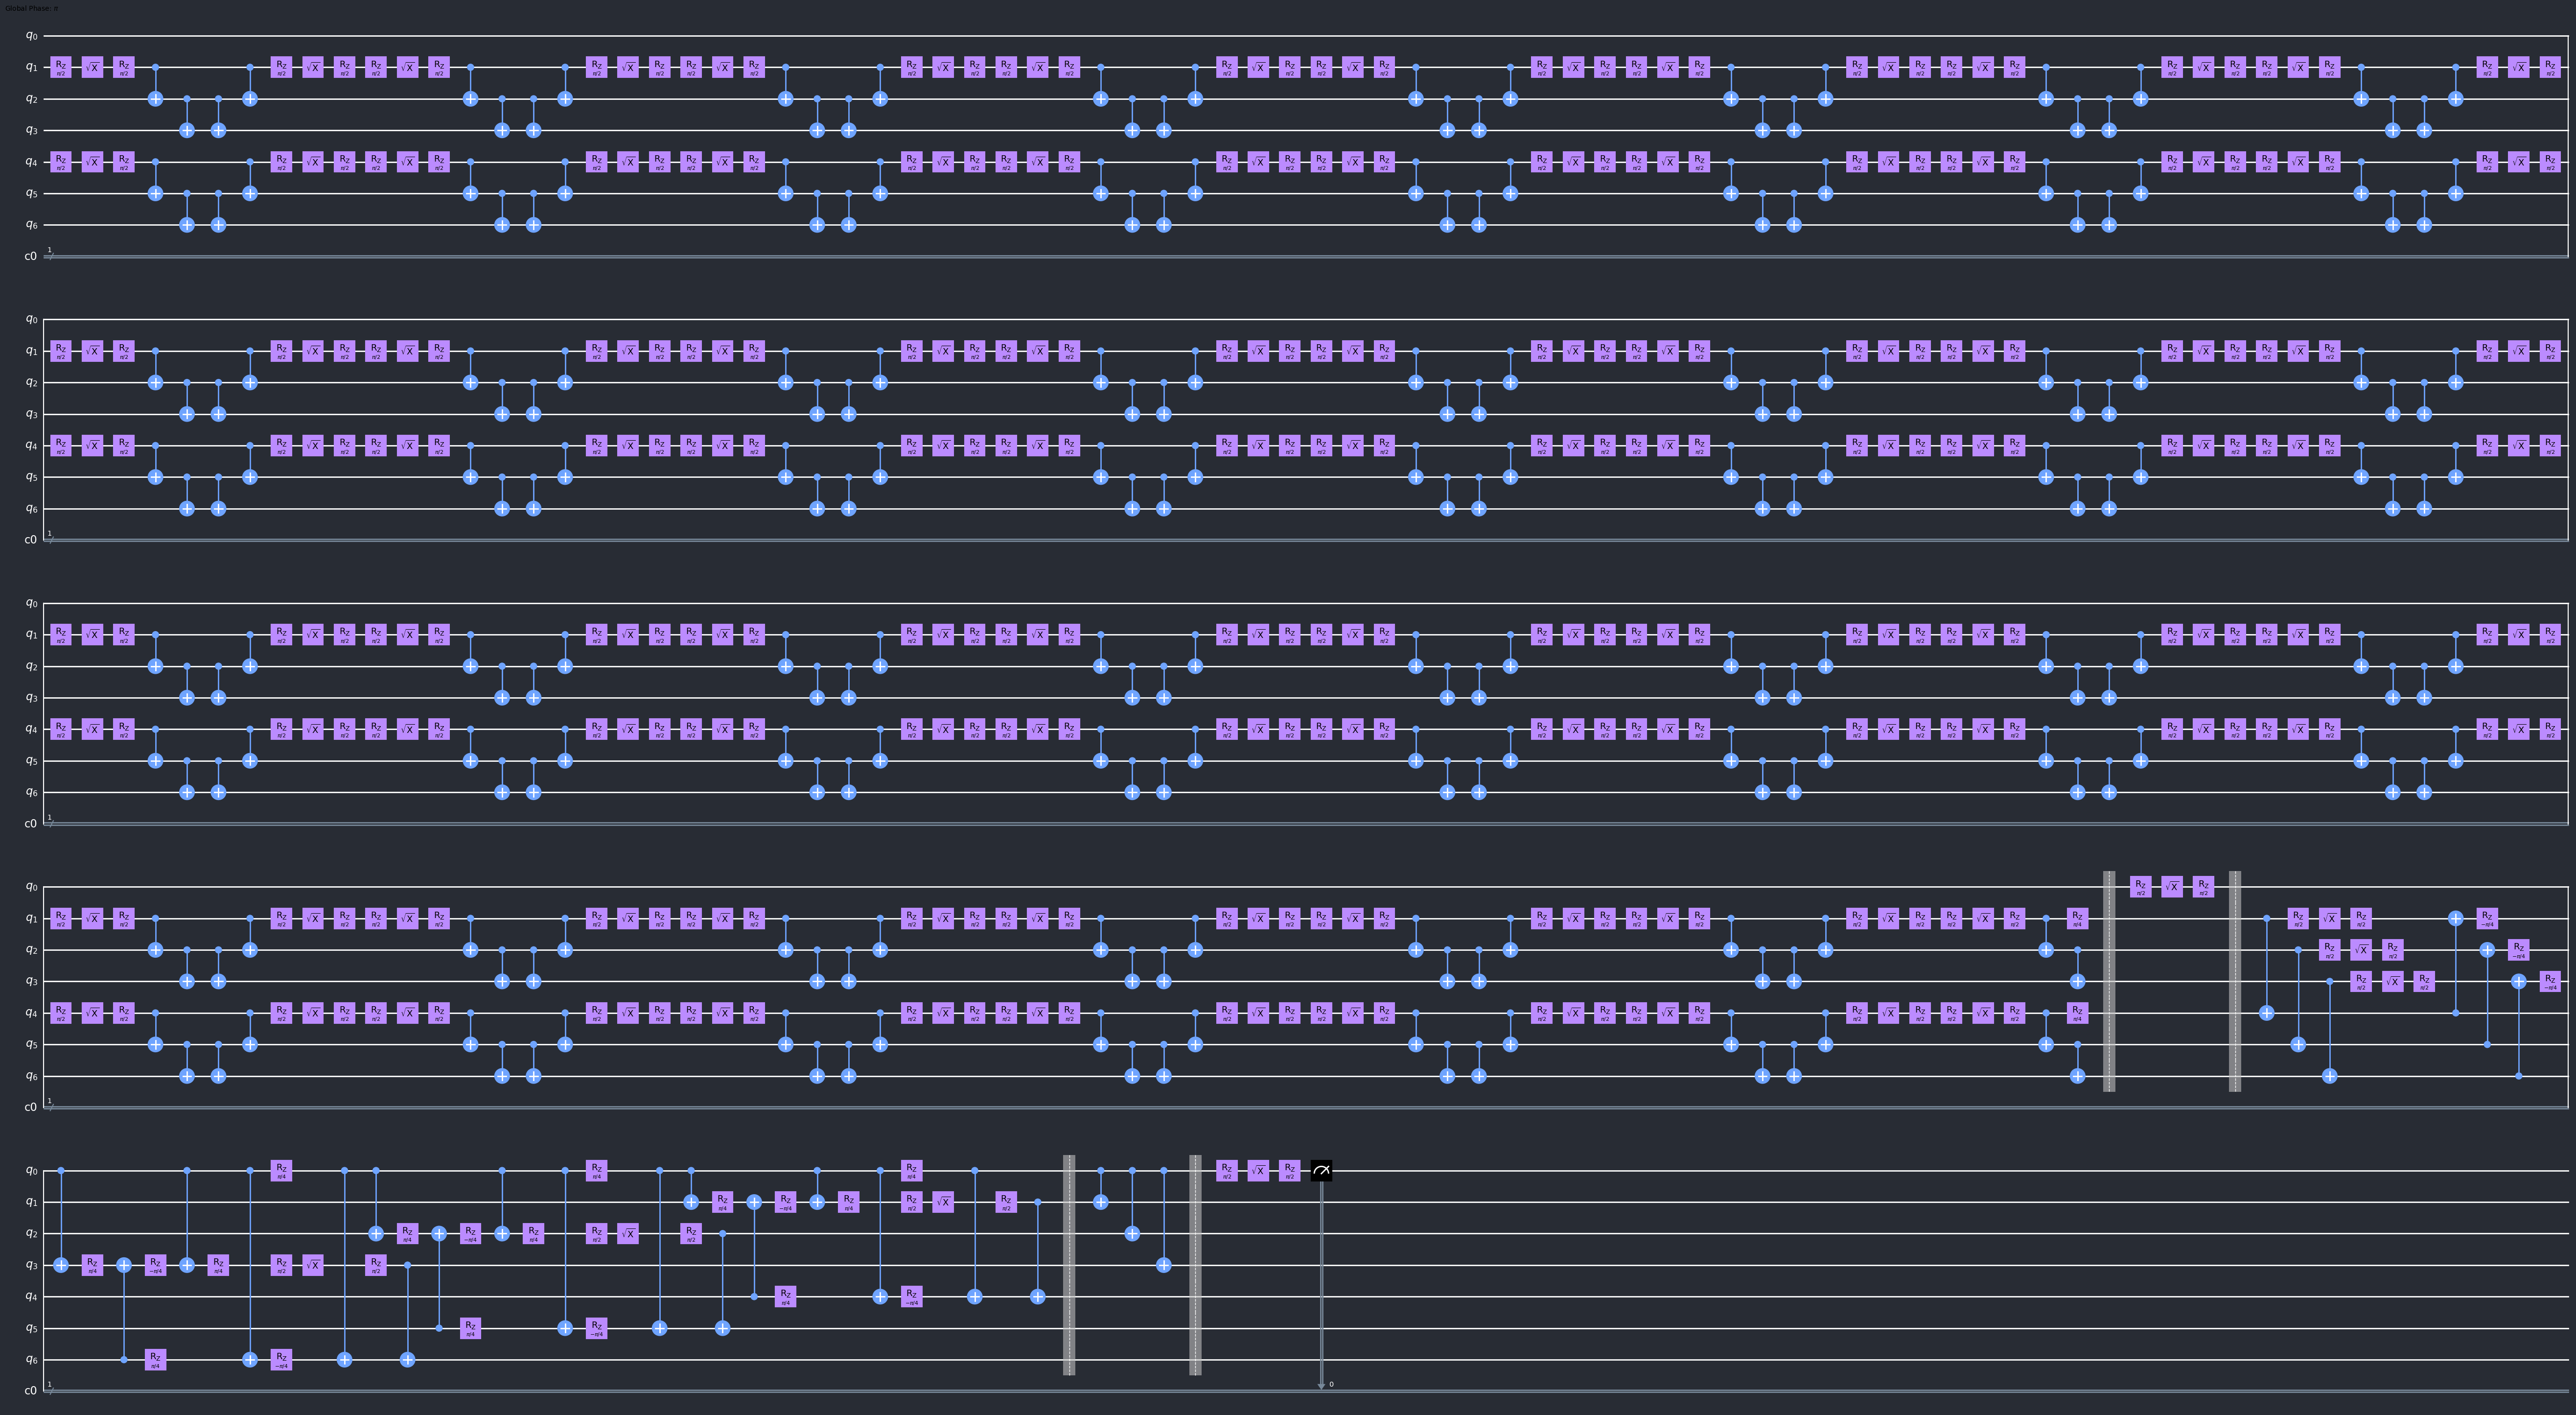

In [25]:
no_coupling_measure.mitFullCirc().draw(fold = 80)

In [26]:
no_coupling_no_measure = esdCircuit(copies = copies, initial_state = initial_state, obs = obs,
                        basis_gates = basis_gates, seed = seed, opt_level = opt_level,
                        coupling_map=None, measure=False)

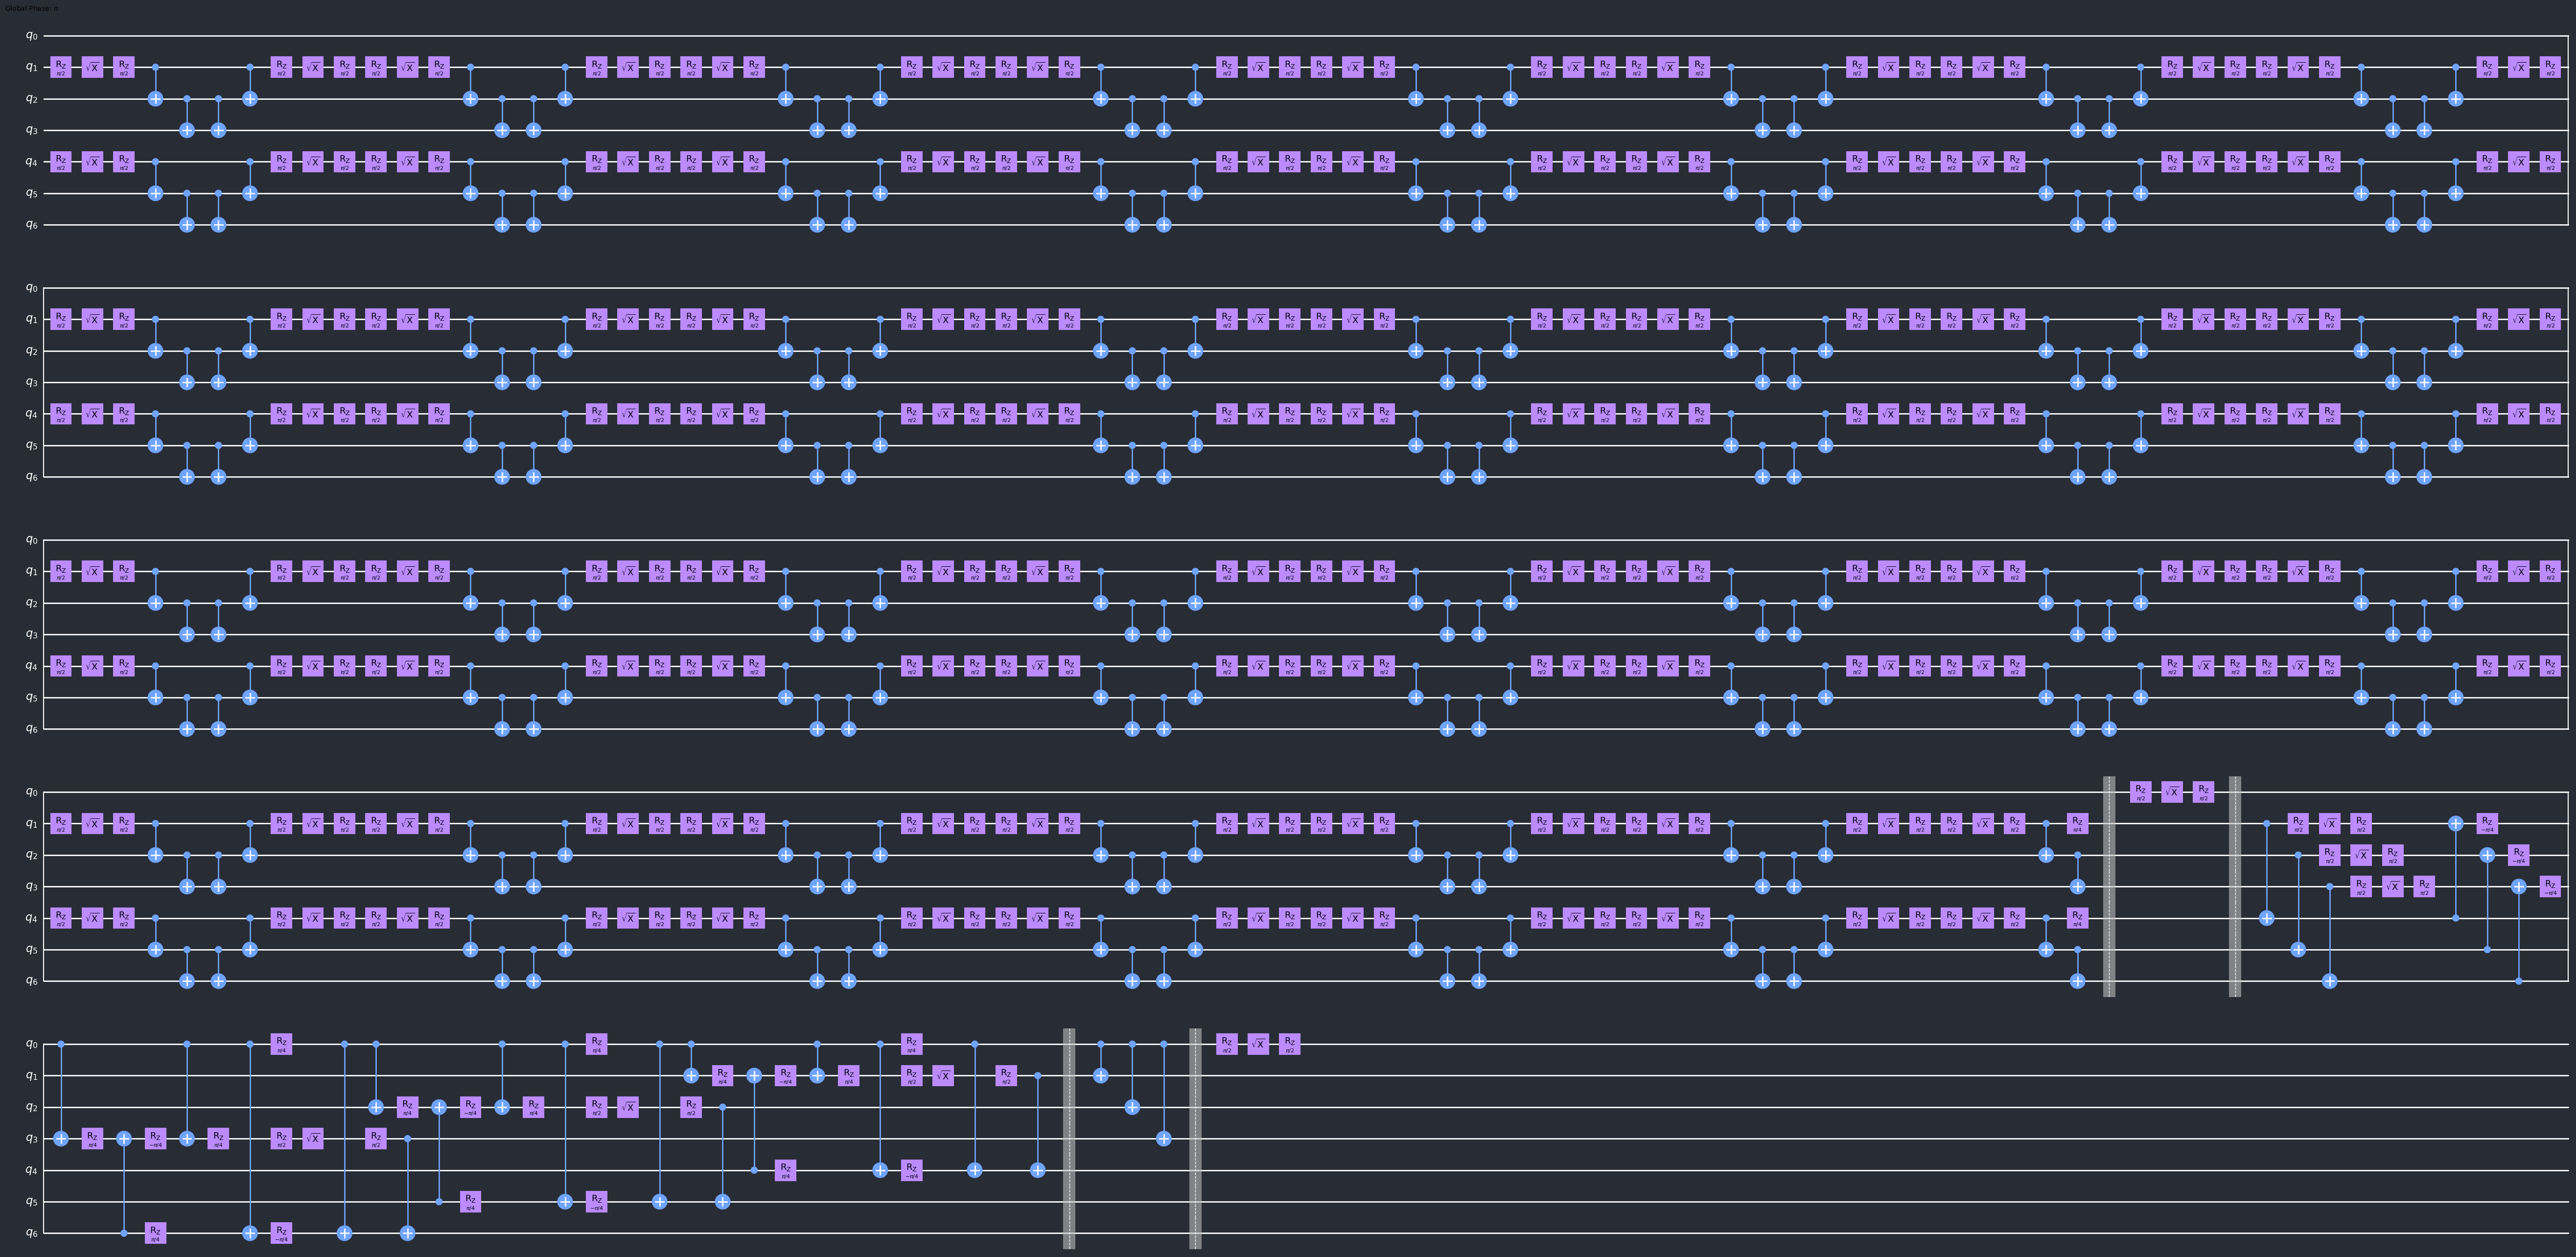

In [27]:
no_coupling_no_measure.mitFullCirc().draw(fold = 80)

In [28]:
with_coupling_measure = esdCircuit(copies = copies, initial_state = initial_state, obs = obs,
                           basis_gates = basis_gates, seed = seed, opt_level = opt_level,
                           coupling_map = c_map, measure=True)

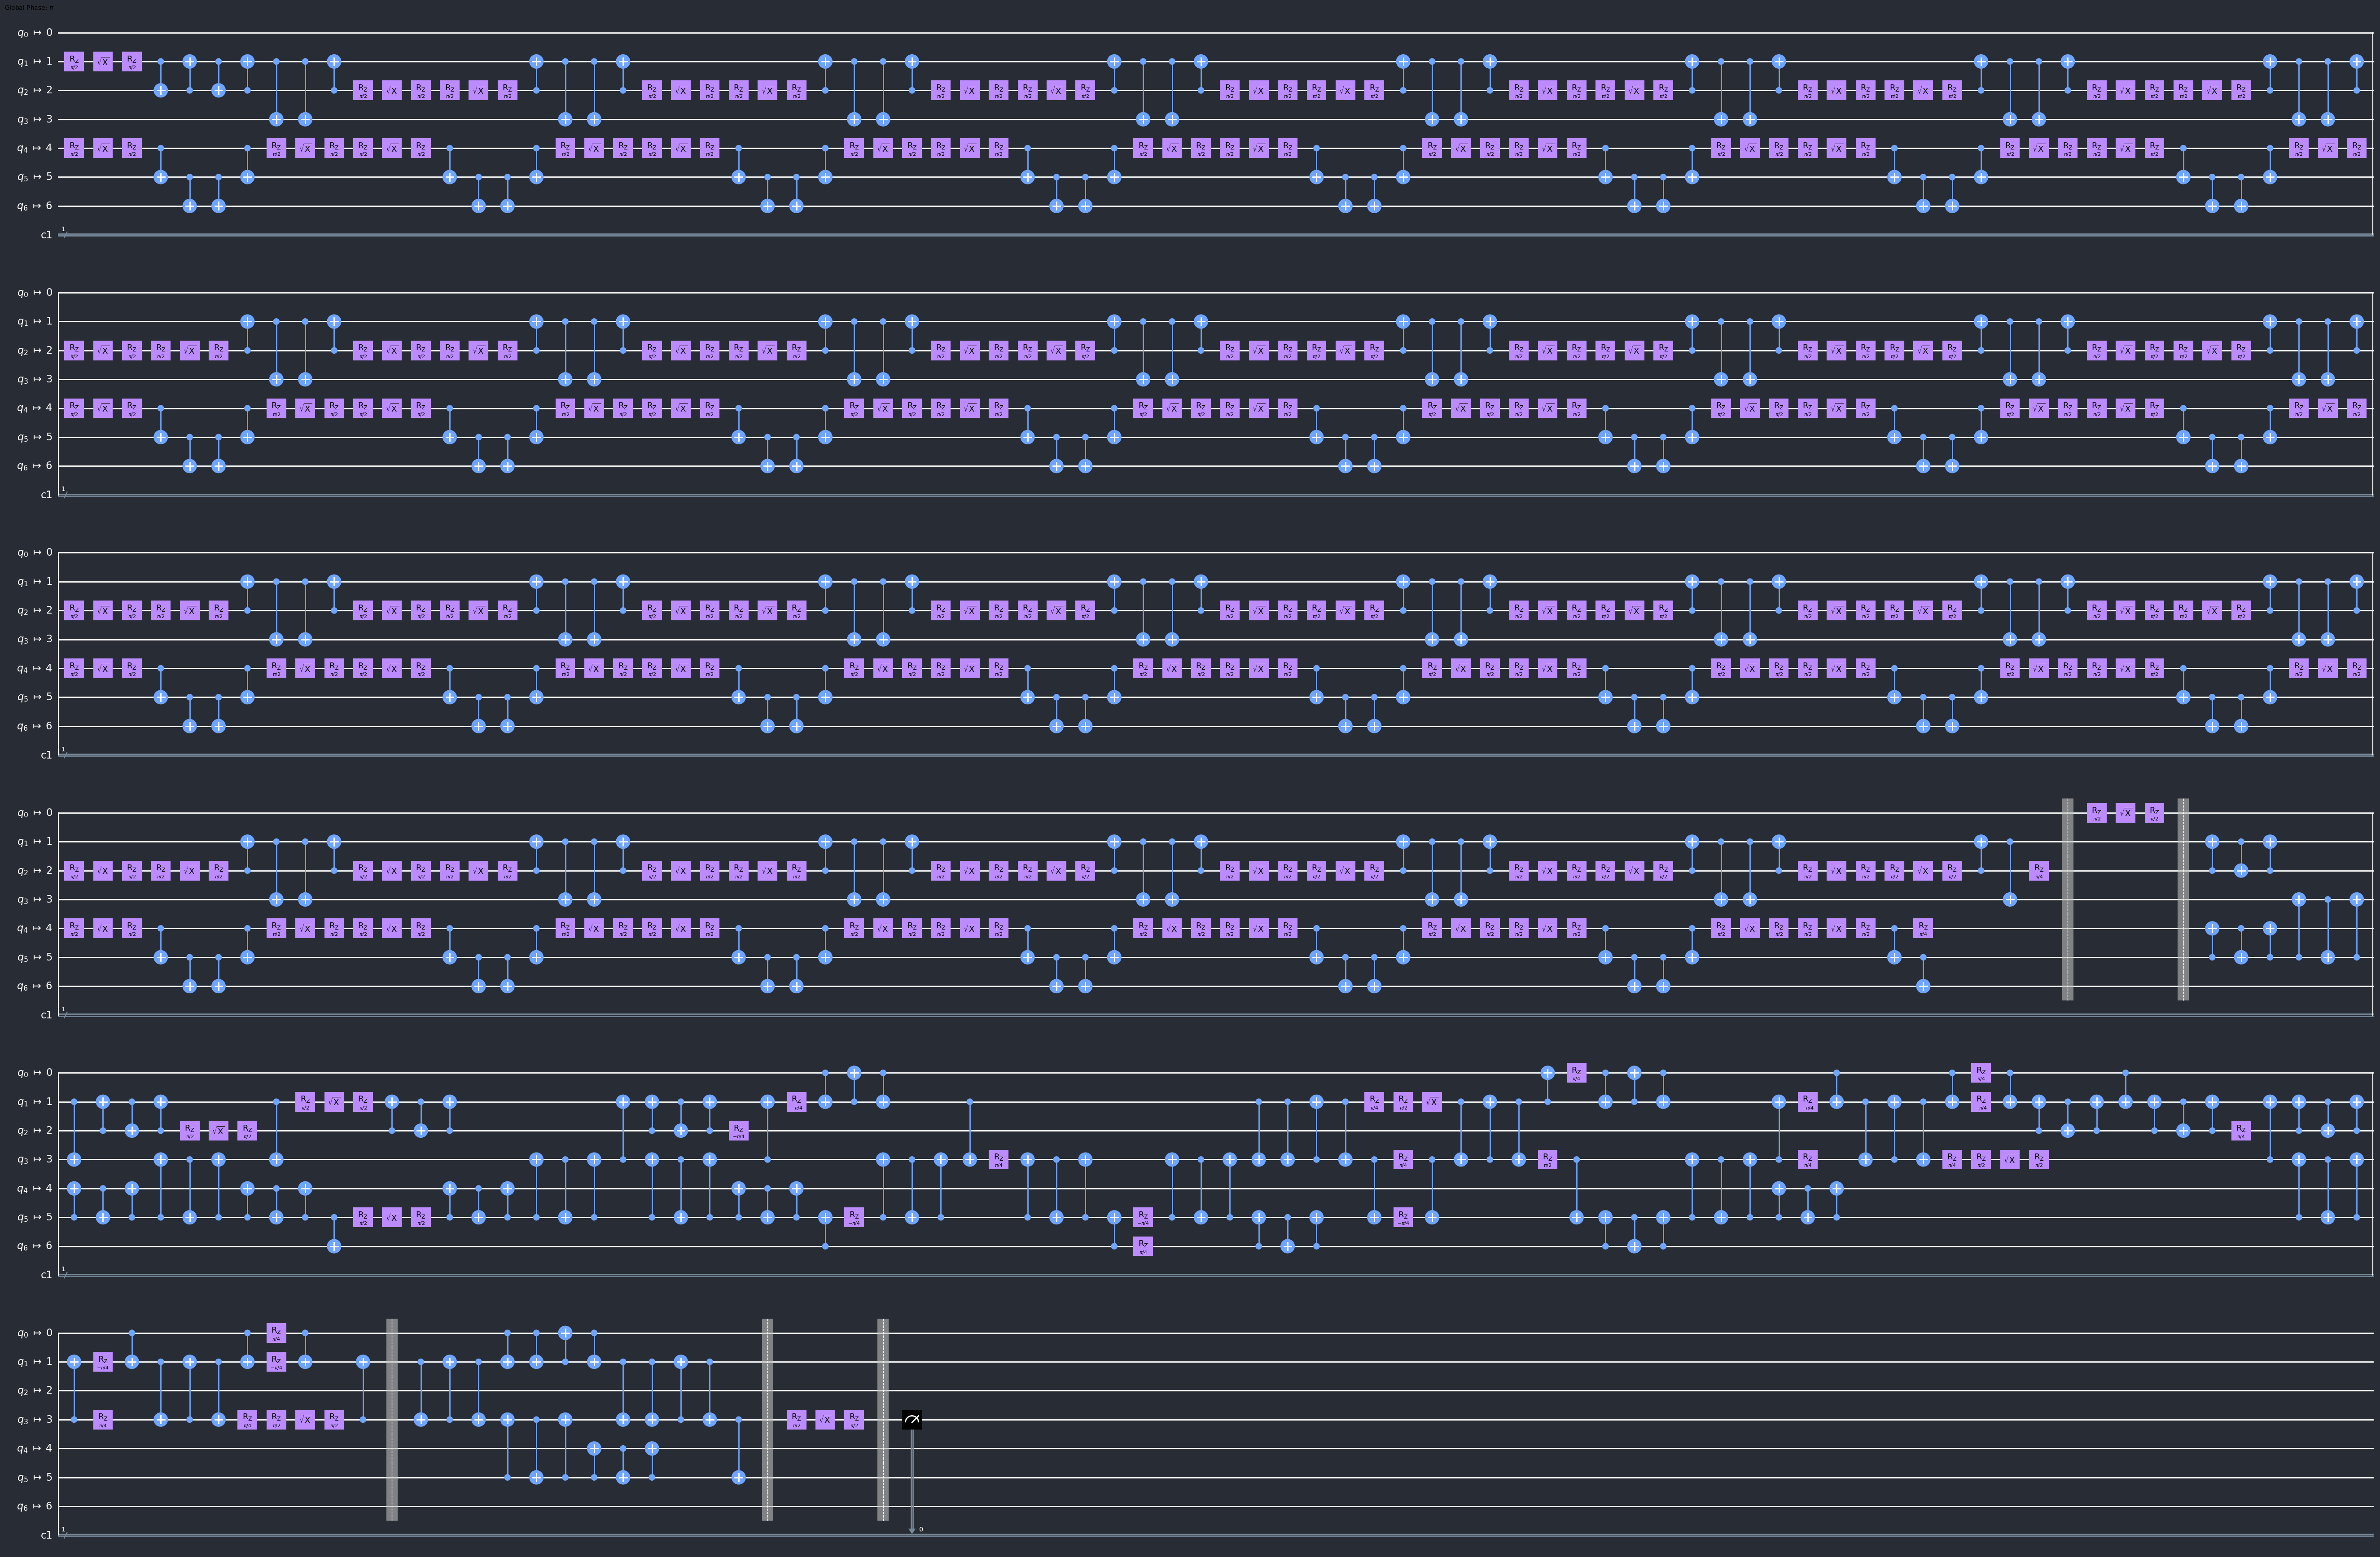

In [29]:
with_coupling_measure.mitFullCirc().draw(fold = 80)

In [30]:
with_coupling_no_measure = esdCircuit(copies = copies, initial_state = initial_state, obs = obs,
                           basis_gates = basis_gates, seed = seed, opt_level = opt_level,
                           coupling_map = c_map, measure=False)

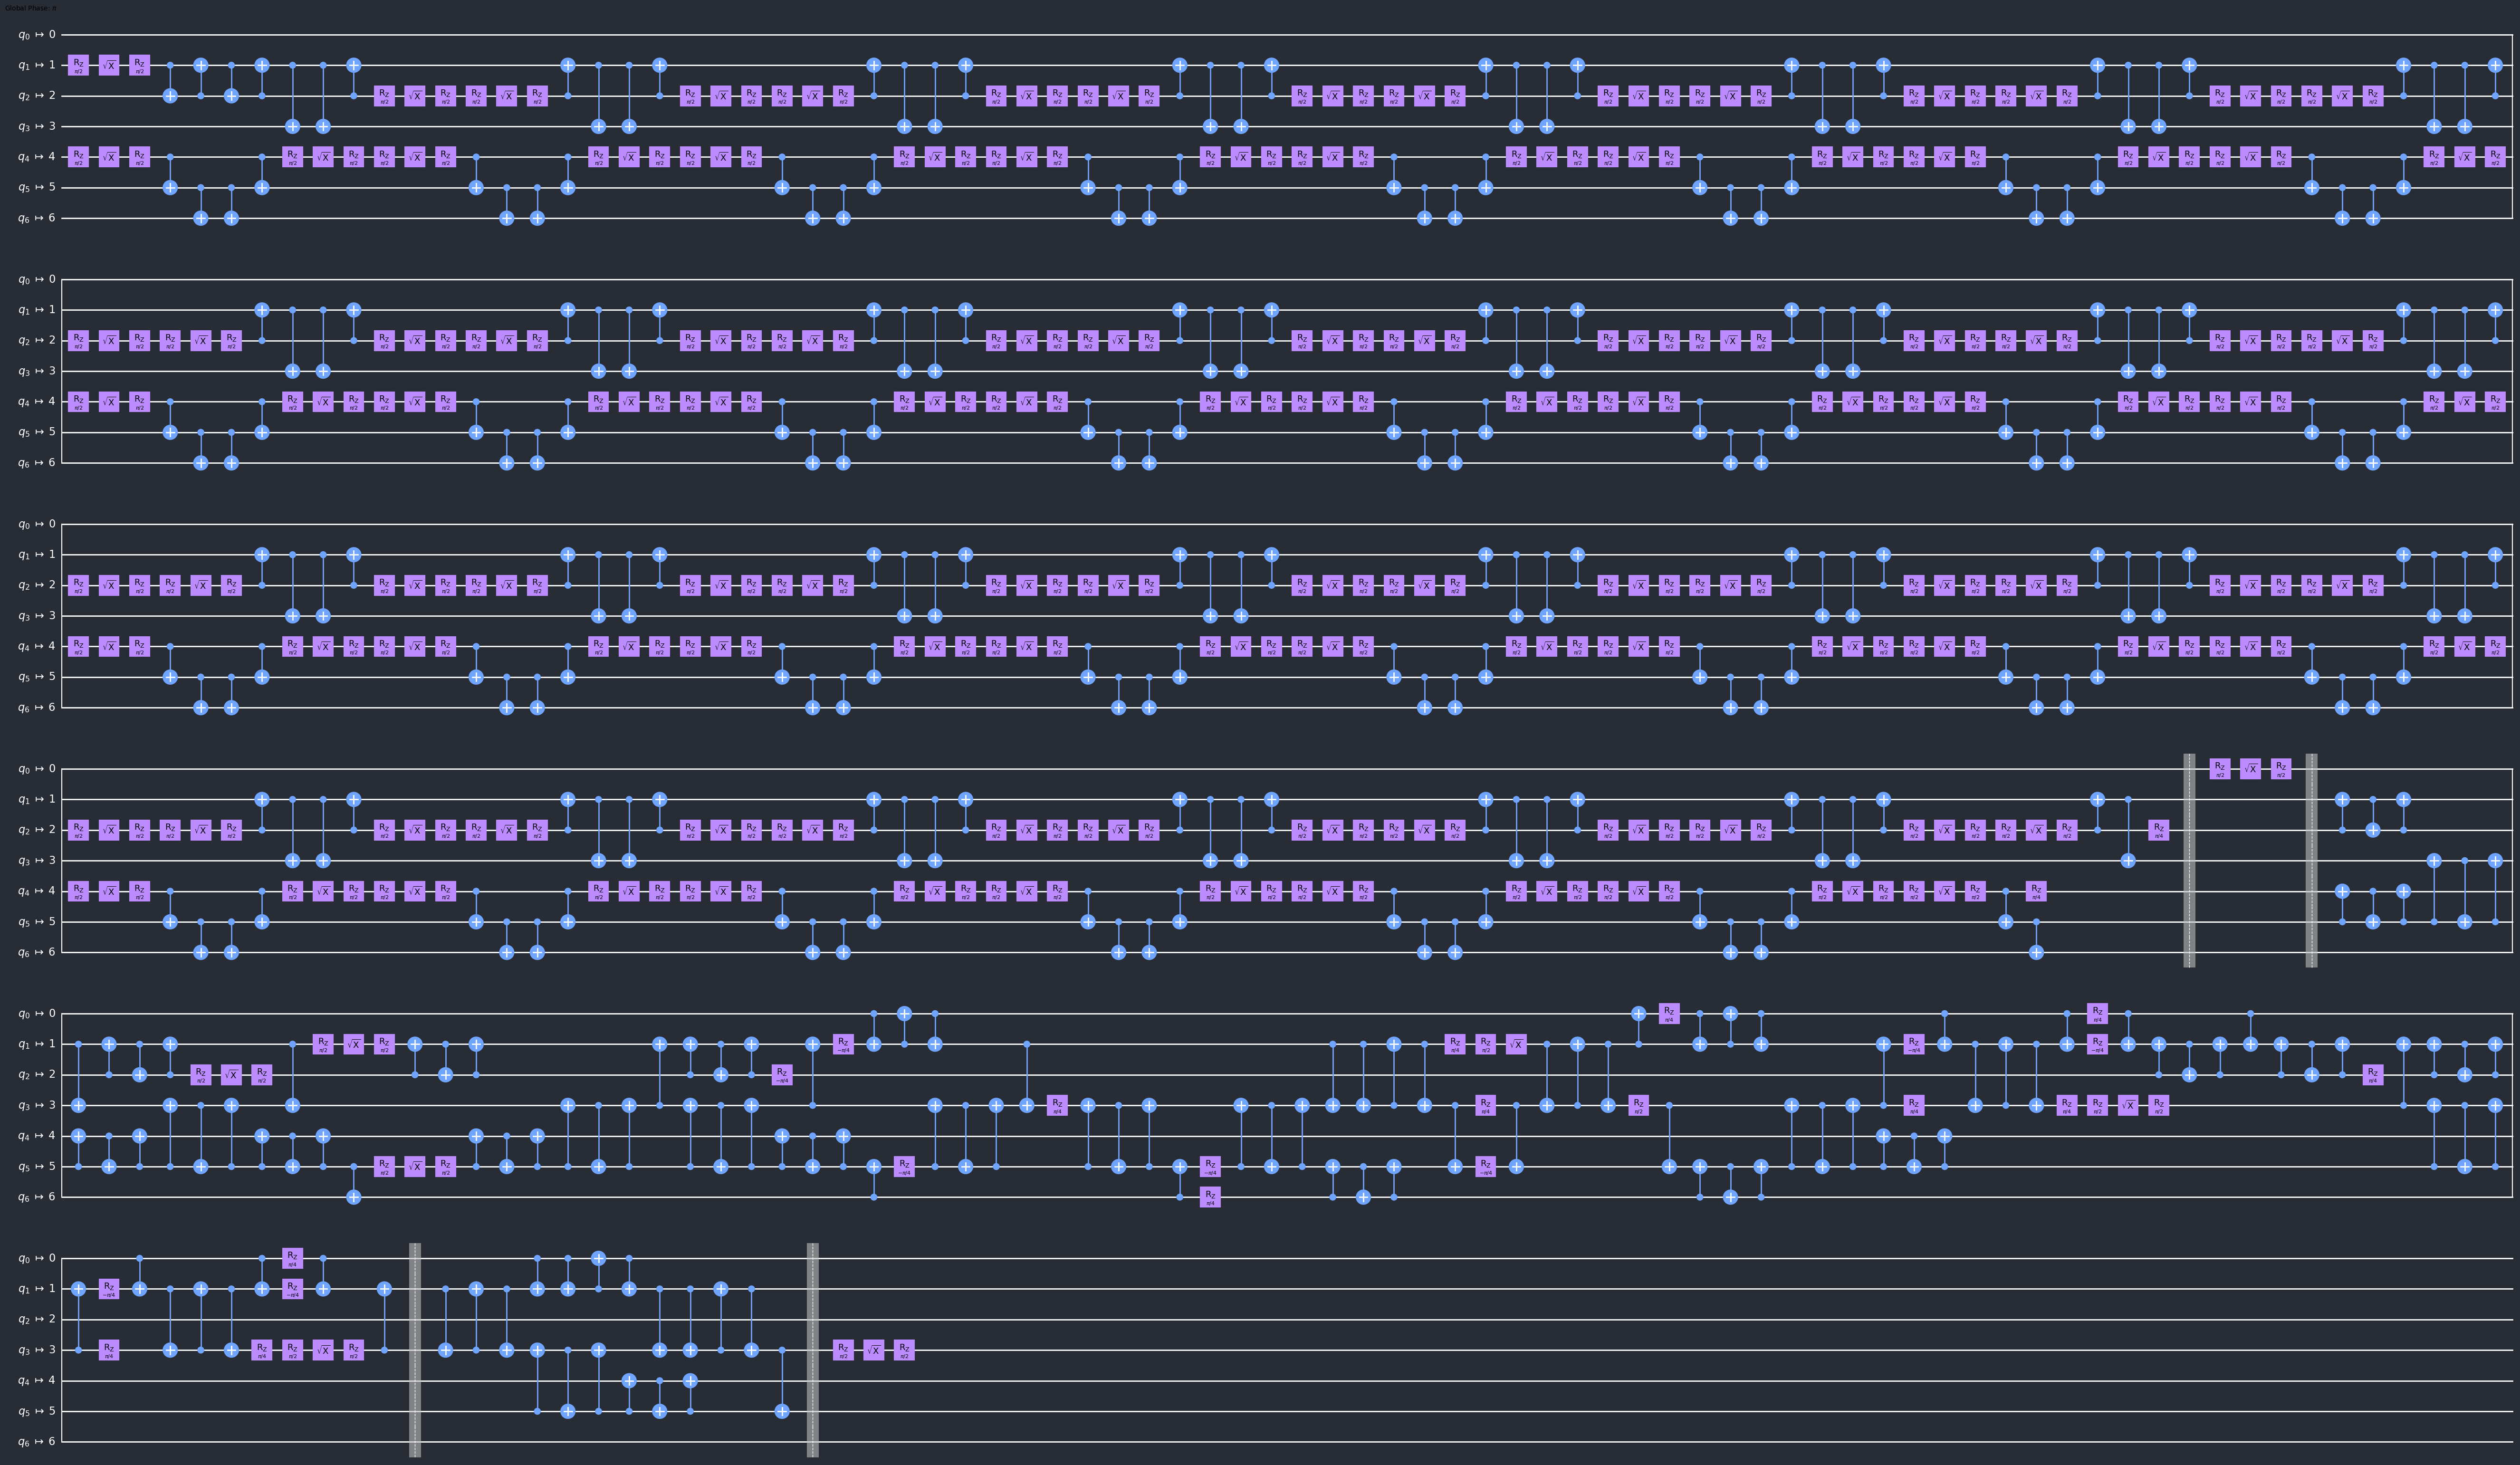

In [31]:
with_coupling_no_measure.mitFullCirc().draw(fold = 80)

## Noise model

In [32]:
noise_nairobi_no_readout = esdNoiseModel()
noise_nairobi_no_readout.specifyFakeDevice(fake_backend_name='fake_nairobi')

In [33]:
noise_nairobi_readout = esdNoiseModel()
noise_nairobi_readout.specifyFakeDevice(fake_backend_name='fake_nairobi', readout_error = True)

## Experiments

In [34]:
err_range = np.linspace(0, 1, 20)
nb_shots = 1000000

In [35]:
estimator_no_coupling_no_read = esdExperiment(esd_circuit = no_coupling_no_measure, esd_noise_model = noise_nairobi_no_readout,
                                              err_range = err_range, seed = seed)
estimator_no_coupling_no_read.errRange()
estimator_no_coupling_no_read.run(service = service, backend = 'aer', nb_shots = None, coupling_map = None)

100%|██████████| 20/20 [00:11<00:00,  1.78it/s]


()

In [ ]:
sampler_no_coupling_no_read = esdExperiment(esd_circuit = no_coupling_measure, esd_noise_model = noise_nairobi_no_readout,
                                              err_range = err_range, seed = seed)
sampler_no_coupling_no_read.errRange()
sampler_no_coupling_no_read.run(service = service, backend = 'qasm_sampler', nb_shots = nb_shots , coupling_map = None)

In [ ]:
estimator_coupling_no_read = esdExperiment(esd_circuit = with_coupling_no_measure, esd_noise_model = noise_nairobi_no_readout,
                                              err_range = err_range, seed = seed)
estimator_coupling_no_read.errRange()
estimator_coupling_no_read.run(service = service, backend = 'aer', nb_shots = None , coupling_map = None)

100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


()

In [ ]:
sampler_coupling_no_read = esdExperiment(esd_circuit = with_coupling_measure, esd_noise_model = noise_nairobi_no_readout,
                                              err_range = err_range, seed = seed)
sampler_coupling_no_read.errRange()
sampler_coupling_no_read.run(service = service, backend = 'qasm_sampler', nb_shots = nb_shots , coupling_map = None)

100%|██████████| 20/20 [00:02<00:00,  6.91it/s]


In [ ]:
estimator_coupling_read = esdExperiment(esd_circuit = with_coupling_no_measure, esd_noise_model = noise_nairobi_readout,
                                              err_range = err_range, seed = seed)
estimator_coupling_read.errRange()
estimator_coupling_read.run(service = service, backend = 'aer', nb_shots = None , coupling_map = None)

100%|██████████| 20/20 [00:15<00:00,  1.27it/s]


()

In [ ]:
sampler_coupling_read = esdExperiment(esd_circuit = with_coupling_measure, esd_noise_model = noise_nairobi_readout,
                                              err_range = err_range, seed = seed)
sampler_coupling_read.errRange()
sampler_coupling_read.run(service = service, backend = 'qasm_sampler', nb_shots = nb_shots , coupling_map = None)

100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


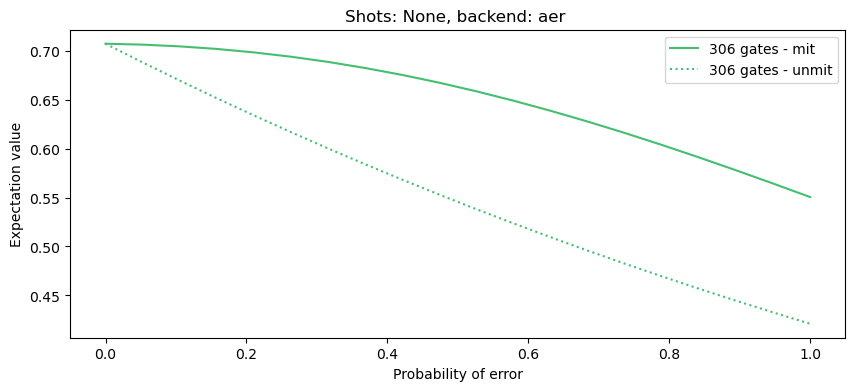

In [21]:
estimator_no_coupling_no_read.errorExpectationGraph()

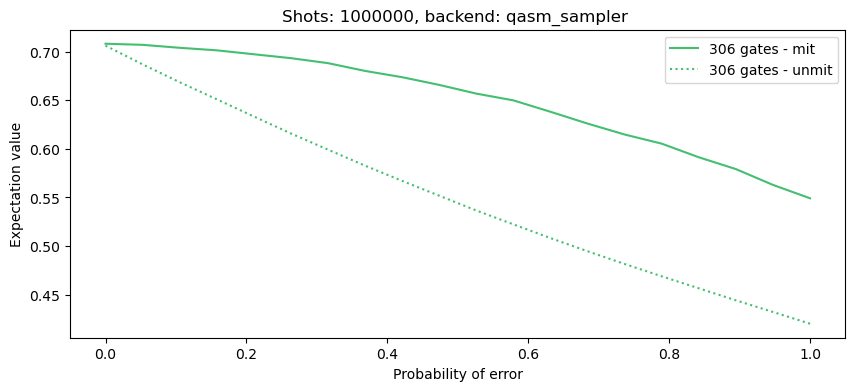

In [22]:
sampler_no_coupling_no_read.errorExpectationGraph()

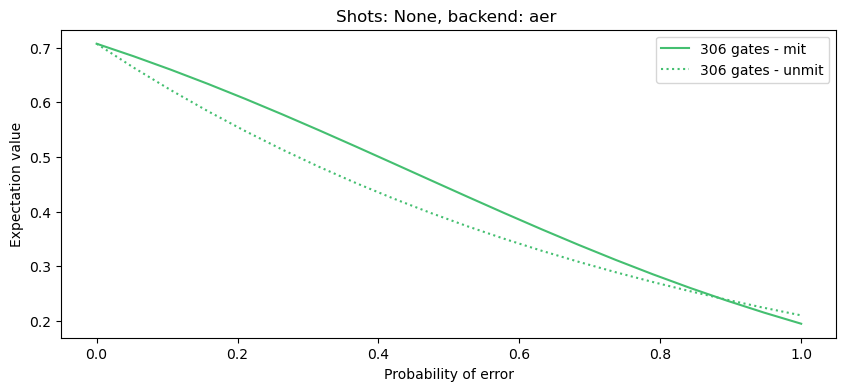

In [23]:
estimator_coupling_no_read.errorExpectationGraph()

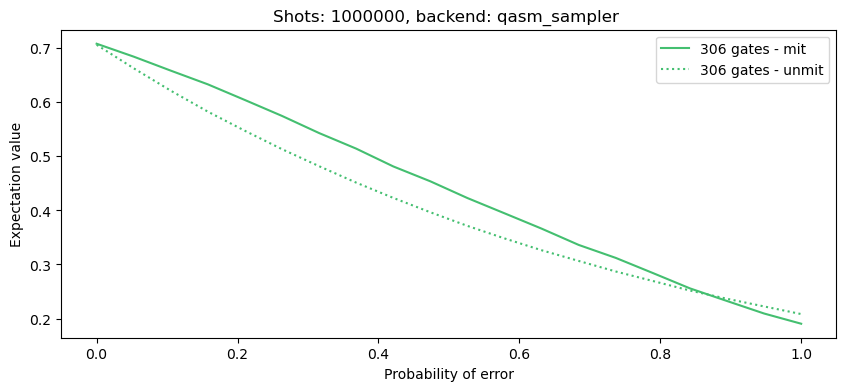

In [24]:
sampler_coupling_no_read.errorExpectationGraph()

In [16]:
noise_hanoi_no_readout = esdNoiseModel()
noise_hanoi_no_readout.specifyFakeDevice(fake_backend_name='fake_hanoi')

In [17]:
err_range = np.linspace(0, 1, 20)
nb_shots = 1000000

In [18]:
estimator_no_coupling_no_read = esdExperiment(esd_circuit = no_coupling_no_measure, esd_noise_model = noise_hanoi_no_readout,
                                              err_range = err_range, seed = seed)
estimator_no_coupling_no_read.errRange()
estimator_no_coupling_no_read.run(service = service, backend = 'aer', nb_shots = None, coupling_map = None)

100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


()

In [20]:
estimator_coupling_no_read = esdExperiment(esd_circuit = with_coupling_no_measure, esd_noise_model = noise_hanoi_no_readout,
                                              err_range = err_range, seed = seed)
estimator_coupling_no_read.errRange()
estimator_coupling_no_read.run(service = service, backend = 'aer', nb_shots = None , coupling_map = None)

100%|██████████| 20/20 [00:11<00:00,  1.69it/s]


()

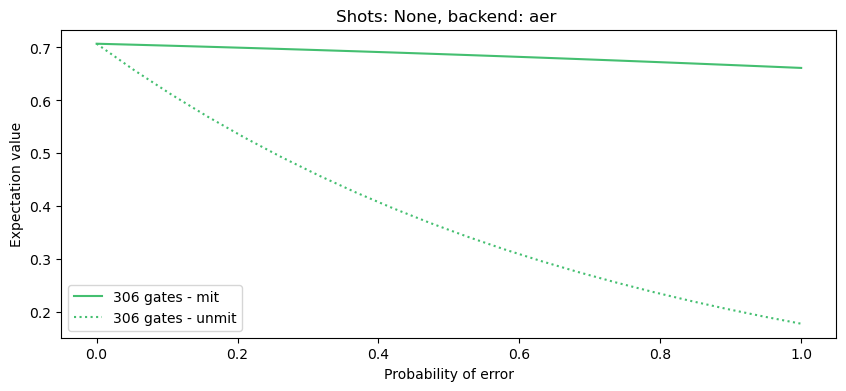

In [19]:
estimator_no_coupling_no_read.errorExpectationGraph()

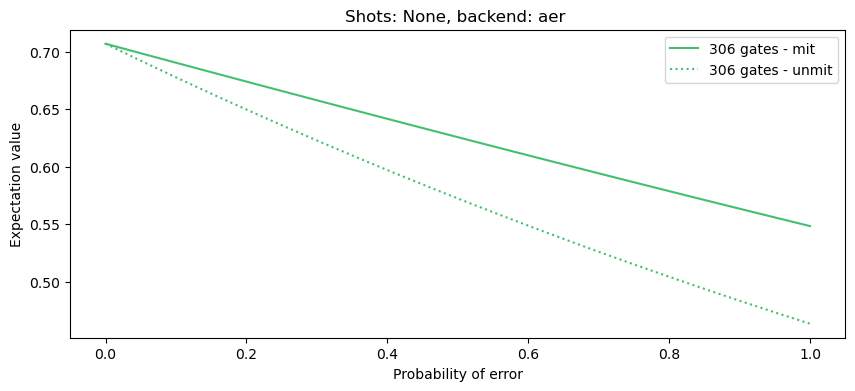

In [21]:
estimator_coupling_no_read.errorExpectationGraph()

In [22]:
sampler_coupling_no_read = esdExperiment(esd_circuit = with_coupling_measure, esd_noise_model = noise_hanoi_no_readout,
                                              err_range = err_range, seed = seed)
sampler_coupling_no_read.errRange()
sampler_coupling_no_read.run(service = service, backend = 'qasm_sampler', nb_shots = nb_shots , coupling_map = None)

100%|██████████| 20/20 [00:10<00:00,  1.97it/s]


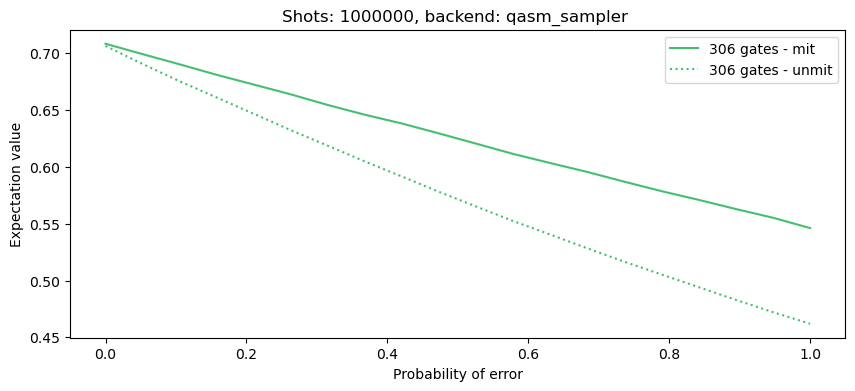

In [23]:
sampler_coupling_no_read.errorExpectationGraph()